**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Benjamin Hinnant
- Desmond Vu
- Kayla Maldonado
- Alexander Gao
- Keshav Tiwari

# Research Question

What is the relationship between the racial backgrounds and urbanization levels of western and eastern states, and what is their effect on COVID-19 mortality rates in the USA?  




## Background & Prior Work

During the COVID-19 pandemic, several analyses determined that people of color (POC) were experiencing a disproportionately larger COVID-19 mortality rate than Caucasians. One report from the APM Research Lab was written by Elisabeth Gawthrop, who used state-reported data from the U.S. Centers for Disease Control and Prevention, or CDC. She determined that as of September 27 of 2023, the COVID-19 mortality rate for Black individuals was around 55% higher than the rate for Caucasian individuals. The mortality rate for Latinos was nearly 65% higher than Caucasians (Gawthrop).  

Another study done by Latoya Hill and Samantha Artiga used data from the CDC and the National Center for Health Statistics (NCHS). They determined that the largest differences in COVID-19 mortality rates between racial groups occurred during surges in the pandemic when the total mortality rate was particularly high. The first surge in COVID-19 deaths peaked in July 2020, and during this month, Hispanic individuals were five times more likely to die than Caucasians, American Indian or Alaska Natives (AIAN) were four times as likely to die, and Blacks were three times as likely to die. During the second surge in December 2020 and January 2021, all POC analyzed (Blacks, Hispanics, and AIAN) had higher rates of death than Caucasians. (Hill and Artiga).

These previous studies have already assessed the relationship between racial background and COVID-19 mortality rates. As a result, we now want to determine the relationship between three variables: racial background, the level of urbanization, and whether the region of interest is an eastern or western state. We then want to determine the effect of these variables on COVID-19 mortality rates. By determining if any of these variables has a significant effect on mortality rates, we hope to potentially discover trends that can guide a future pandemic response.


References 

Gawthrop, Elisabeth. “Color of Coronavirus: COVID-19 deaths analyzed by race and ethnicity — APM Research Lab.” APM Research Lab, 19 October 2023, https://www.apmresearchlab.org/covid/deaths-by-race. Accessed 25 February 2024. 

Hill, Latoya, and Samantha Artiga. “COVID-19 Cases and Deaths by Race/Ethnicity: Current Data and Changes Over Time.” KFF, 22 August 2022, https://www.kff.org/racial-equity-and-health-policy/issue-brief/covid-19-cases-and-deaths-by-race-ethnicity-current-data-and-changes-over-time/. Accessed 24 February 2024. 


# Hypothesis


We predict that areas with a higher urbanization level will have higher COVID-19 mortality rates. Within the confined spaces of an urban region, there are more opportunities for the uninfected population to make contact with COVID-19 infected individuals. We also predict that areas with a larger population of racial minorities will have higher COVID-19 mortality rates, since these communities often have less resources available and may find it more difficult to treat every infected patient optimally. Combining our previous predictions, we predict that urban areas with a larger population of racial minorities will have the highest COVID-19 mortality rates, while rural areas with a smaller population of racial minorities will have the lowest COVID-19 mortality rates.

# Data

## Data Overview
**Dataset #1**
- Dataset name: Provisional COVID-19 Deaths by County, and Race and Hispanic Origin
- [Link to dataset](https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-County-and-Race-and/k8wy-p9cg/about_data)
- Number of Observations: 3,687
- Number of Variables: 21

**Description:** The dataset we are utilizing to address our question is the Provisional COVID-19 Deaths by County and Race and Hispanic Origin dataset, directly sourced from the Centers for Disease Control and Prevention (CDC) website. This dataset covers the period from January 4, 2020, to September 27, 2023, collected weekly from counties across all 50 states. It comprises around 3,700 observations with string and integer data types. The dataset is mostly complete, with NaN values only present for different racial populations. Key columns in the dataset include county name, state name, total deaths from all causes, deaths involving COVID-19, a description of the level of urbanization, and percentages of each racial category (such as Asian, White, Hispanic, American Indian, etc.). Deaths involving COVID-19 are identified by the presence of an U07.1 diagnosis code assigned to a deceased patient, which is assigned only if a patient tests positive for COVID-19. The urbanization level is determined by the National Center for Health Statistics (NCHS) Urban-Rural Classification Scheme for Counties, categorizing counties into 6 urban-rural categories suitable for health analyses.

**Important Variables:**
- Percentage of Race: Indicates the proportion of each racial category affected by COVID-19 in each county.
- Urbanization level: Describes the level of urbanization of a county on a scale of 1 (large metropolitan city) to 6 (small non-core area), providing insights into how different counties address health access, resources, and disease prevention.
- State Name: The state from which the data is collected, aiding in the analysis of regional differences in COVID-19.
- Deaths by COVID-19: The number of deaths with a leading cause of COVID-19.

**Data Wrangling:** As our focus is on COVID-19 deaths, affected populations, geographic locations, and urbanization levels, this dataset provides all the necessary information to address our research question. However, we do have concerns regarding missing data on certain races due to privacy concerns and unnecessary columns that are not required for this project. To address these, we cleaned the dataset by removing columns such as total deaths and ensured that we only considered counties that reported affected racial groups. This step was crucial to ensure the validity of our analysis by including as many individuals as possible in our observations. Despite the removal of some columns, we deemed this necessary given the ample data available from various counties that included racial populations for our analysis.



## Dataset #1 Provisional COVID-19 Deaths by County, and Race and Hispanic Origin

In [19]:
# Set up
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Reading the CSV file
df = pd.read_csv('Provisional_COVID-19_Deaths_by_County__and_Race_and_Hispanic_Origin_20240224.csv')

In [21]:
# How does the file look like
df.head()

,Data as of,Start Date,End Date,State,County Name,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Indicator,...,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic,Other,Urban Rural Description,Footnote
0,09/27/2023,01/01/2020,09/23/2023,AK,Anchorage Municipality,3,2,20,2020,Distribution of all-cause deaths (%),...,787,0.568,0.044,0.216,0.058,0.030,0.033,0.050,Medium metro,NaN
1,09/27/2023,01/01/2020,09/23/2023,AK,Anchorage Municipality,3,2,20,2020,Distribution of COVID-19 deaths (%),...,787,0.452,0.037,0.255,0.111,0.074,0.038,0.033,Medium metro,NaN
2,09/27/2023,01/01/2020,09/23/2023,AK,Anchorage Municipality,3,2,20,2020,Distribution of population (%),...,787,0.564,0.052,0.083,0.098,0.031,0.095,0.077,Medium metro,NaN
3,09/27/2023,01/01/2020,09/23/2023,AK,Fairbanks North Star Borough,4,2,90,2090,Distribution of all-cause deaths (%),...,214,0.710,0.024,0.173,0.020,NaN,0.027,0.044,Small metro,One or more data cells have counts between 1-9...
4,09/27/2023,01/01/2020,09/23/2023,AK,Fairbanks North Star Borough,4,2,90,2090,Distribution of COVID-19 deaths (%),...,214,0.626,NaN,0.257,NaN,NaN,NaN,0.056,Small metro,One or more data cells have counts between 1-9...


In [22]:
# Clean Data to only include rows for deaths from COVID-19
df = df[df['Indicator'] == 'Distribution of COVID-19 deaths (%)']
df.reset_index(drop=True, inplace=True)

In [23]:
# Clean Data to only include coastal states(Column with East, West)
coast_states = ['WA', 'OR', 'CA', 'ME', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'VA', 'NC', 'SC', 'GA', 'FL']
df['Coast'] = df['State'].apply(lambda x: 'West' if x in ['CA', 'OR', 'WA'] else 'East')
df = df[df['State'].isin(coast_states)]
df.shape

(500, 22)

In [24]:
# 170 coastal counties where theres info for Non-Hispanic Whites, Non-Hispanic Blacks, Hispanics, Non-Hispanic Asians
mask_white = df['Non-Hispanic White'].notna()
mask_black = df['Non-Hispanic Black'].notna()
mask_asian = df['Non-Hispanic Asian'].notna()
mask_hispanic = df['Hispanic'].notna()
combined_mask = mask_white & mask_black & mask_hispanic &mask_asian
num_rows_non_nan = combined_mask.sum()



In [25]:
#One of the biggest challenges we were thinking about was that a lot of counties had different or missing information for ethnicities. Some counties have information for every ethnicity, while others have missing data for one ethnicity only or for many ethnicities. Taking a look at the data, at least a significant number of counties had information for Non-Hispanic White, Black and Asians and Hispanics, which we felt was strong enough to analyze racial data trends for these counties. Thus we kept counties which had information for these categories and added one which were all ethnicities outside of these.
# Drop counties where theres missing info in any of aforementioned columns
df = df[combined_mask]
df.reset_index(drop=True, inplace=True)
df['Non-White, Non-Black, Non-Hispanic, Non-Asian'] = 1 - df['Non-Hispanic White'] - df['Non-Hispanic Black'] - df['Hispanic'] - df['Non-Hispanic Asian']


In [26]:
# Drop unnecessary columns, Remember Data is from 01/01/2020 to 09/23/2023
df = df.drop(['Data as of', 'Start Date', 'End Date', 'Urban Rural Code', 'FIPS State', 'FIPS Code','FIPS County', 'Indicator'], axis=1)

In [27]:
# Rearrange the columns to have data arranged in desirable order
df = df[["State","County Name", "Coast","Total deaths", "COVID-19 Deaths","Non-Hispanic White","Non-Hispanic Black", "Hispanic", "Non-Hispanic Asian", "Non-White, Non-Black, Non-Hispanic, Non-Asian", "Non-Hispanic American Indian or Alaska Native","Non-Hispanic Native Hawaiian or Other Pacific Islander","Other","Urban Rural Description","Footnote"]]

In [28]:
# Because we standardized the ethnicity data above, we decide to remove all data for specific ethnicities which we are not observing and only keep the ones that we described above.
df = df.drop(['Non-Hispanic American Indian or Alaska Native','Non-Hispanic Native Hawaiian or Other Pacific Islander', 'Other', 'Footnote'], axis=1)
df.head()

,State,County Name,Coast,Total deaths,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,"Non-White, Non-Black, Non-Hispanic, Non-Asian",Urban Rural Description
0,CA,Alameda County,West,41916,2628,0.312,0.191,0.239,0.219,0.039,Large central metro
1,CA,Butte County,West,9294,789,0.790,0.015,0.119,0.041,0.035,Small metro
2,CA,Contra Costa County,West,31889,1754,0.536,0.127,0.198,0.111,0.028,Large fringe metro
3,CA,Fresno County,West,33704,3278,0.393,0.046,0.450,0.092,0.019,Medium metro
4,CA,Kern County,West,27860,2711,0.373,0.058,0.505,0.040,0.024,Medium metro


In [29]:
# Cleaned dataset
df.shape

(170, 11)

### Data Cleaning

To get the data into a usable format, we first had to keep only the parts of the data that were deaths specific to COVID, as the data also included non-COVID deaths. Based on our research question, we wanted to analyze states on the east and west coast. So, we only kept the remaining data that were for counties in east and west coast states. Then, we had to analyze which parts of the data were missing. Even though there were columns for specific ethnicities such as American Indian or Native Hawaiian, a lot of counties had missing information for these columns and only had data for few columns Non-Hispanic Whites and Non-Hispanic Blacks and NaN for others. In order to standardize the data, while still having a decent number of obvservations, we decided to see how many counties had data for Non-Hispanic Whites, Non-Hispanic Blacks, Non-Hispanic Asians, and Hispanics, which was 170, and removed those which didn’t. Then, we added essentially a column that was for the proportion of the population not in those ethnicities (the remainder/other column basically). Finally, we dropped a lot of columns which were unnecessary to our data, such as codes for counties and states (which do not provide as easily understandable info as county names and state names) and date-range, which was standard across the whole data set (1/2020 to 9/2023). We also removed total deaths, as we only cared about COVID-19 deaths.

# Results

## Exploratory Data Analysis

Before we delve into the EDA, it is important to note that our data comprises of small units that cumulate together to answer our research question. Therefore, creating the characteristics table in order to understand our data better first requires the collation of county-wise mortality counts into state and coastal levels of granularity. Moreoever, all data must also be reorganized as per differing Rural Urban Descriptions, in order for us to better understand our dataset's ability to explore the relationships between different urbanization levels and racial backgrounds in the context of COVID-19 Deaths.

Also, one aspect we need to be aware of is that because a lot of counties have a higher population than others, naturally, they will have a higher number of COVID deaths. Thus, we need to make sure that we take into account the covid death rate in order to truly understand what factors cause a higher percentage of COVID deaths. To this, we add a column called COVID death rate, which is the number of COVID deaths divided by the total number of deaths.

In [33]:
df["Portion of Deaths due to COVID"] = df["COVID-19 Deaths"] / df["Total deaths"]
df.head()

,State,County Name,Coast,Total deaths,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,"Non-White, Non-Black, Non-Hispanic, Non-Asian",Urban Rural Description,Portion of Deaths due to COVID
0,CA,Alameda County,West,41916,2628,0.312,0.191,0.239,0.219,0.039,Large central metro,0.062697
1,CA,Butte County,West,9294,789,0.790,0.015,0.119,0.041,0.035,Small metro,0.084893
2,CA,Contra Costa County,West,31889,1754,0.536,0.127,0.198,0.111,0.028,Large fringe metro,0.055003
3,CA,Fresno County,West,33704,3278,0.393,0.046,0.450,0.092,0.019,Medium metro,0.097258
4,CA,Kern County,West,27860,2711,0.373,0.058,0.505,0.040,0.024,Medium metro,0.097308


### Section 1: Shifting from county to coastal levels of granularity

In order to compare east and west coast states, we must transform our data from county-wise proportions to a much higher level of granularity. By doing that, we can much easier observe patterns/comprehend if there is any preliminary relationships/distributions that can be seen in our cleaned dataset.

In [51]:
state_deaths = df.groupby('State').agg({'COVID-19 Deaths': 'sum'})
state_total_deaths = df.groupby('State').agg({'Total deaths': 'sum'})

race_columns = ['Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic', 'Non-Hispanic Asian', 'Non-White, Non-Black, Non-Hispanic, Non-Asian']
race_deaths = pd.DataFrame()
for col in race_columns:
    race_deaths[col] = df[col] * df['COVID-19 Deaths']
state_race_deaths = race_deaths.groupby(df['State']).sum()
state_race_death_proportions = state_race_deaths.div(state_deaths['COVID-19 Deaths'], axis=0)
state_df = pd.concat([state_deaths, state_race_death_proportions], axis=1)

state_df.insert(1, 'Total deaths', state_total_deaths['Total deaths'])
state_df.insert(2, 'Portion of Deaths due to COVID', state_deaths['COVID-19 Deaths']/state_total_deaths['Total deaths'])



coast_deaths = df.groupby('Coast').agg({'COVID-19 Deaths':'sum'})
coast_total_deaths = df.groupby('Coast').agg({'Total deaths': 'sum'})
race_deaths_coast = pd.DataFrame()
for col in race_columns:
    race_deaths_coast[col] = df[col] * df['COVID-19 Deaths']
coast_race_deaths = race_deaths_coast.groupby(df['Coast']).sum()
coast_race_death_proportions = coast_race_deaths.div(coast_deaths['COVID-19 Deaths'], axis=0)
coast_df = pd.concat([coast_deaths, coast_race_death_proportions], axis=1)
coast_df.insert(1, 'Total deaths', coast_total_deaths['Total deaths'])
coast_df.insert(2, 'Portion of Deaths due to COVID', coast_deaths['COVID-19 Deaths']/coast_total_deaths['Total deaths'])


location_df = pd.concat([coast_df, state_df], axis=0)

coastal_mean = pd.DataFrame(coast_df[race_columns].mean())

location_df.head()


,COVID-19 Deaths,Total deaths,Portion of Deaths due to COVID,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,"Non-White, Non-Black, Non-Hispanic, Non-Asian"
East,308361,3058381,0.100825,0.604031,0.197201,0.150331,0.038731,0.009706
West,116605,1308280,0.089128,0.409395,0.068750,0.382217,0.114059,0.025578
CA,103793,1096827,0.094630,0.365473,0.071580,0.420816,0.119665,0.022466
CT,11220,112140,0.100054,0.736910,0.130128,0.111873,0.015340,0.005749
DE,1785,22575,0.079070,0.711000,0.229000,0.047000,0.011000,0.002000


### Section 2 : Shifting from county to urbanization levels of granularity

This section helps us look at different counties's central tendency when collated into distinct Urban Rural Descriptions. For it, we need to follow a similar process to the earlier shift in granularity.

In [52]:
urban_deaths = df.groupby('Urban Rural Description').agg({'COVID-19 Deaths': 'sum'})
urban_total_deaths = df.groupby('Urban Rural Description').agg({'Total deaths': 'sum'})

race_columns = ['Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic', 'Non-Hispanic Asian', 'Non-White, Non-Black, Non-Hispanic, Non-Asian']
race_deaths = pd.DataFrame()
for col in race_columns:
    race_deaths[col] = df[col] * df['COVID-19 Deaths']
urban_race_deaths = race_deaths.groupby(df['Urban Rural Description']).sum()
urban_death_proportions = urban_race_deaths.div(urban_deaths['COVID-19 Deaths'], axis=0)
urban_df = pd.concat([urban_deaths, urban_death_proportions], axis=1)

urban_df.insert(1, 'Total deaths', urban_total_deaths['Total deaths'])
urban_df.insert(2, 'Portion of Deaths due to COVID', urban_deaths['COVID-19 Deaths']/urban_total_deaths['Total deaths'])



urban_mean = pd.DataFrame(urban_df[race_columns].mean())

urban_df.head()

,COVID-19 Deaths,Total deaths,Portion of Deaths due to COVID,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,"Non-White, Non-Black, Non-Hispanic, Non-Asian"
Urban Rural Description,,,,,,,,
Large central metro,191458,1898063,0.100870,0.417235,0.180711,0.295912,0.087729,0.018414
Large fringe metro,127965,1328164,0.096347,0.629158,0.162205,0.153517,0.045279,0.009841
Medium metro,99183,1078031,0.092004,0.696529,0.130604,0.136558,0.025022,0.011288
Small metro,6360,62403,0.101918,0.710745,0.081267,0.169957,0.026856,0.011176


Upon running some basic operations on our cleaned dataset, we now have a clearer picture of it. Through the operations, we were able to collate county-wide data into state and then eventually coast-based data on how differing racial backgrounds contribute to COVID-19 Deaths. 


In [62]:
display(location_df)
display(urban_df)

,COVID-19 Deaths,Total deaths,Portion of Deaths due to COVID,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,"Non-White, Non-Black, Non-Hispanic, Non-Asian"
East,308361,3058381,0.100825,0.604031,0.197201,0.150331,0.038731,0.009706
West,116605,1308280,0.089128,0.409395,0.068750,0.382217,0.114059,0.025578
CA,103793,1096827,0.094630,0.365473,0.071580,0.420816,0.119665,0.022466
CT,11220,112140,0.100054,0.736910,0.130128,0.111873,0.015340,0.005749
DE,1785,22575,0.079070,0.711000,0.229000,0.047000,0.011000,0.002000
FL,71835,788709,0.091079,0.579327,0.163834,0.235863,0.015229,0.005747
GA,17831,187722,0.094986,0.524462,0.379070,0.064399,0.027953,0.004117
MA,18331,197817,0.092666,0.797811,0.069738,0.081987,0.035390,0.015074
MD,13712,154126,0.088966,0.467536,0.404675,0.079256,0.043006,0.005526
NC,14094,166180,0.084812,0.670630,0.246959,0.055425,0.017636,0.009350


,COVID-19 Deaths,Total deaths,Portion of Deaths due to COVID,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,"Non-White, Non-Black, Non-Hispanic, Non-Asian"
Urban Rural Description,,,,,,,,
Large central metro,191458,1898063,0.100870,0.417235,0.180711,0.295912,0.087729,0.018414
Large fringe metro,127965,1328164,0.096347,0.629158,0.162205,0.153517,0.045279,0.009841
Medium metro,99183,1078031,0.092004,0.696529,0.130604,0.136558,0.025022,0.011288
Small metro,6360,62403,0.101918,0.710745,0.081267,0.169957,0.026856,0.011176


##### Size
There have been 170 observations (rows) and 10 columns as established earlier upon the cleaning of our data. Then, all of that data is collated together to give us differing levels of granularity.
#### Missingness
No observations were missing, since it was ensured that through the cleaning process, there must remain a consistent number of observations across different racial backgrounds. This is reflected by the mathematicaaly sound proportion calculations made, that do not reflect NaN for any division by 0.
#### Shape
We will be exploring distributions for this data in the following section.
#### Central Tendency and Variability
By cumulating all county-based proportions into coast-based and urbanization-based proportions, the proportion values calculated were a fair indication of the central tendencies of the data. As for our cleaned dataset, we will explore central tendencies and variabilities through the following discussion on distributions. 

### Exploring Relationships between variables and COVID-19 Mortality Rates

In this section we will be looking at the correlations between our variables and the COVID-19 mortality rates.

### Total COVID Deaths vs Coast

Text(0.5, 1.0, 'COVID-19 Deaths for West and East Coast')

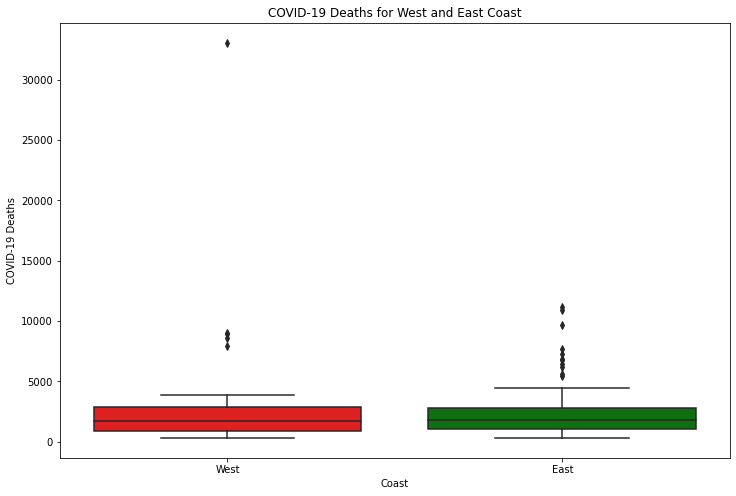

In [54]:
plt.figure(figsize = (12, 8))

boxplot = sns.boxplot(data = df, y = 'COVID-19 Deaths', x = 'Coast', palette = ['r', 'g'])
boxplot.set_xlabel('Coast')
boxplot.set_title('COVID-19 Deaths for West and East Coast')



Looking at this graph, we can see the general distributions of COVID-19 Deaths between the West and East Coast. We can see that the East Coast has more outliers than the West Coast. We can also see that the interquartile range between the West and East Coast are fairly similar.

### Percentage of Total Deaths caused by COVID vs Coast

However, order to more accurately measure the relationship between coasts and COVID deaths, we also want to take a look at the covid death rates divided the total deaths in the population. Otherwise (whichever coast has the higher population would just end up having a higher number of COVID deaths). Also, this would negate the effect of the largest counties, such as Los Angeles County, being outliers compared to the median county size

Text(0.5, 1.0, 'Ratio of Total Deaths due to COVID for West and East Coast')

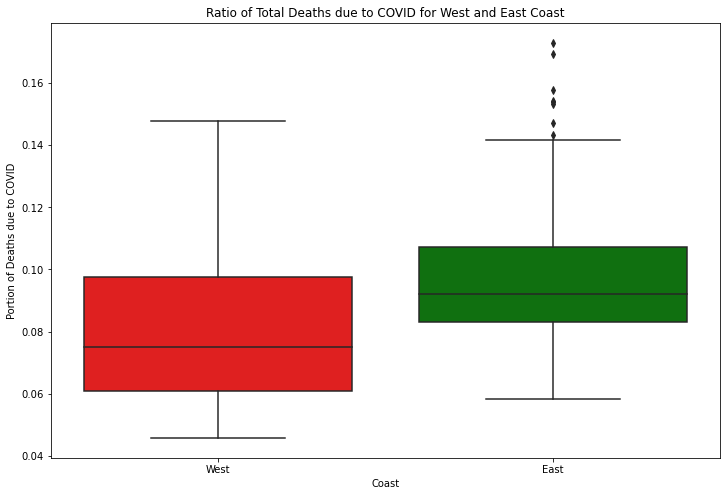

In [55]:
plt.figure(figsize = (12, 8))

boxplot = sns.boxplot(data = df, y = 'Portion of Deaths due to COVID', x = 'Coast', palette = ['r', 'g'])
boxplot.set_xlabel('Coast')
boxplot.set_title('Ratio of Total Deaths due to COVID for West and East Coast')

Based on this distribution, we can see that West Coast states have a much lower median COVID death rate than 
the East Coast, at around 0.75, whereas the East coast states have a higher median rate at around 0.95. Furthermore, the East distribution seems to have a few outliers at a significantly higher COVID 
death rate.

Now, let's take a look at our four different types of urbanization areas, which are Small Metro, Medium Metro, Large Fringe Metro and Large Central Metro.

### Total COVID Deaths vs Urbanization

[Text(0, 0, 'Small metro'),
 Text(1, 0, 'Medium metro'),
 Text(2, 0, 'Large fringe metro'),
 Text(3, 0, 'Large central metro')]

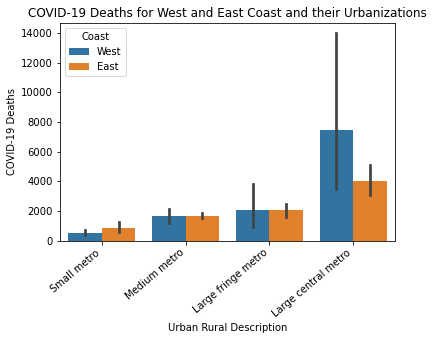

In [15]:

barplot = sns.barplot(data = df, y = 'COVID-19 Deaths', x = 'Urban Rural Description', hue = 'Coast', order = ['Small metro', 'Medium metro', 'Large fringe metro', 'Large central metro'],)
barplot.set_title('COVID-19 Deaths for West and East Coast and their Urbanizations')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")



Looking at this graph, we can see that the West Coast has less COVID-19 Deaths for small metro, similar COVID-19 Deaths for medium metro and large fringe metro, and more COVID-19 Deaths for large central metro when compared to the East Coast.

### Percentage of Total Deaths caused by COVID vs Urbanization
Again, though, we would like to plot the distribution of covid deaths over total deaths for our data set.

[Text(0, 0, 'Small metro'),
 Text(1, 0, 'Medium metro'),
 Text(2, 0, 'Large fringe metro'),
 Text(3, 0, 'Large central metro')]

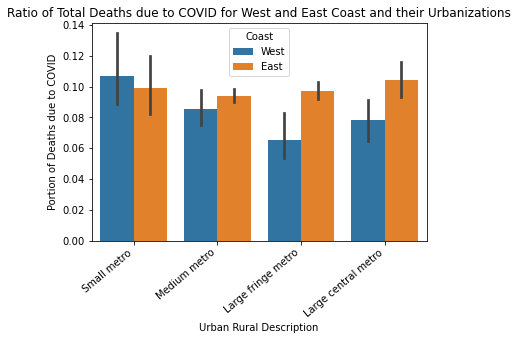

In [56]:
barplot = sns.barplot(data = df, y = 'Portion of Deaths due to COVID', x = 'Urban Rural Description', hue = 'Coast', order = ['Small metro', 'Medium metro', 'Large fringe metro', 'Large central metro'],)
barplot.set_title('Ratio of Total Deaths due to COVID for West and East Coast and their Urbanizations')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")


Interestingly enough, the East Coast seems to have a higher percent of deaths caused by COVID mostly except for small metros, where West Coast has a higher portion of COVID deaths. The difference between East and West Coast is most noticeable in the large fringe metro. Again, West Coast counties tend to have more outliers than East Coast.

# Ethics & Privacy

We do not believe there would be issues regarding the confidentiality of patient/personal information as no names or specific data from one particular person would be used. All results were aggregated ensuring privacy at an individual level.

Moreover, our data is sourced from reputable organizations such as the Health data organization, which adheres to strict ethical and data collection guidelines. Overall we believe our findings could prove to be beneficial to prepare for another pandemic in the future. 

However, it is also very crucial to approach any correlations with caution, avoiding misrepresentation of certain groups/populations of people when dealing with such diseases. Especially when dealing with our dataset that includes some missing values for race categories in a few counties. To account for this, we remove counties that lack proper representation of groups and make sure to only include those who include these values. By addressing these issues earlier during our cleaning portion of the data set we reduce biases before analyzing our data. To reduce bias after creating graphs, we plan on adding captions and carefully explain why we made certain choices: like what data to include, show or talk about for our project. Additionally, we took particular care in our project to ensure that no group is unfairly "blamed" or misrepresented based on their race. Especially given the increasing incidents of Asian hate during the COVID-19 pandemic, we are committed to presenting the data impartially and avoiding prejudice against any group. 


# Team Expectations 

* *Team Expectation 1*
    * Have weekly meetings where everyone can attend. If someone cannot attend then they will get a summary, documenting our meeting’s goals and discussions. In each meeting we will talk about how we can make improvements on our previous checkpoint if needed. Then the rest of the meeting will go over the upcoming checkpoint, assigning what task everyone should do and our goals for that week.
* *Team Expectation 2*
    * Split up work from data wrangling, code, video, and write-up about data: we expect everyone to take a part in the project that plays to their strengths. Those who are good or confident at coding will split the coding portions among themselves (data, wranging, creating graphs etc), and those who are not as confident, would take up the majority of the writing or analysis portion. If all the parts are taken, we plan on having one or two people look over the entire project or step in when help is needed in the coding or writing parts of the project.
* *Team Expecation 3*
    * Overall expectations: We expect every member in our group to contribute equally and be able to respond to our group chat in a reasonable amount of time. We also expect everyone to try to go to our group meetings and if not possible to check in with the group after to see what they missed.


# Project Timeline Proposal

| Week #      | Meeting Time | Weekly Goals |
|------------|--------------|--------------------|
| Week 6     | Sat. 6 PM    | For week 6, we found datasets that fit our research question. Once the best possible dataset was found for our specific topic, we divided the work to conduct some wrangling and cleaning on it, such as detecting redundant columns and tidying the data (e.g., converting age values to only years, weight to only pounds, etc.). |
| Week 7     | Sat. 7 AM    | In week 7, we will start thinking about how to effectively present the data. We'll decide on the types of graphs to use, the reasons behind our choices, explore relationships within our dataset, and ensure the graphs are easily understandable to the viewer. Another words, discuss what we can do with the dataset |
| Week 8     | Sat. 5 PM    | Week 8 will involve cleaning the data frame we chose and correcting any errors outlined by our TA/Professor from the proposal grading|
| Week 9     | Fri. 10 AM   | During week 9, we will work on EDA- creating graphs based on our dataset and correct any additional errors that were pointed our in our previous checkpoint |
| Week 10    |  Sat 5 PM        | Finally, in week 10, we will conduct a final review of our project, ensuring that we meet all the requirements outlined in the project rubric. |
